In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\retail_sales.csv",parse_dates=["date"])
df

,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022
...,...,...
67,2015-05-01,462615
68,2015-06-01,448229
69,2015-07-01,457710
70,2015-08-01,456340


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    72 non-null     datetime64[ns]
 1   sales   72 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [19]:
df.isna().sum()

date     0
sales    0
dtype: int64

In [20]:
#sales data

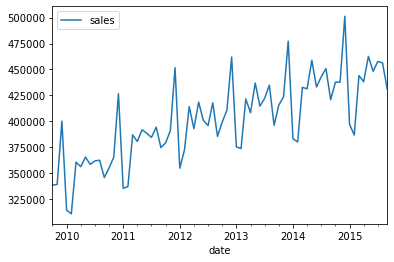

In [21]:
df.plot(x="date",y="sales")

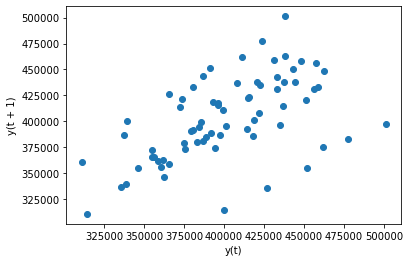

In [22]:
pd.plotting.lag_plot(df.sales)

In [23]:
# autocorralation ACP

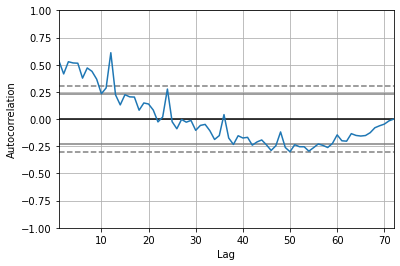

In [24]:
pd.plotting.autocorrelation_plot(df.sales)

In [25]:
# p-- lag order--> AR auto regression

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

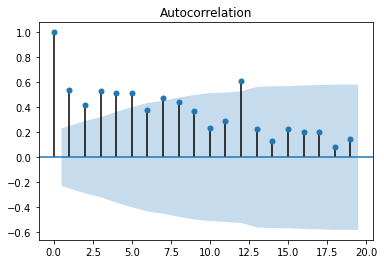

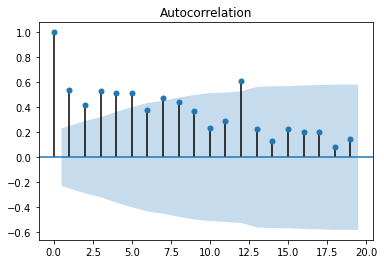

In [27]:
plot_acf(df.sales)

In [28]:
df["Sales_diff"]=df.sales.diff()

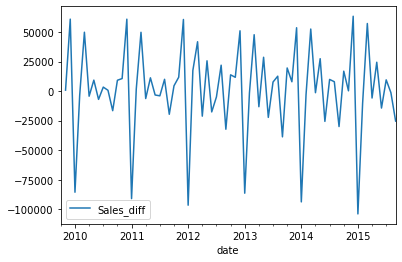

In [29]:
df.plot(x="date",y="Sales_diff")

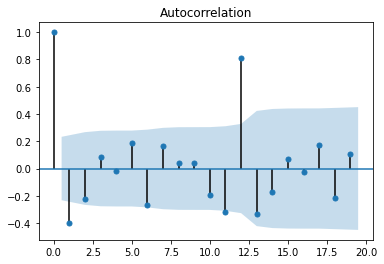

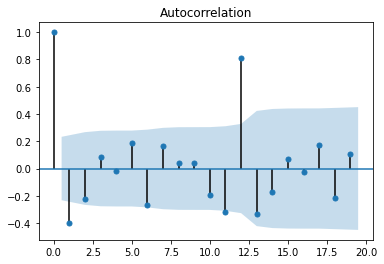

In [30]:
plot_acf(df.Sales_diff.dropna())

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [32]:
df=df.set_index("date")
df

,sales,Sales_diff
date,,
2009-10-01,338630,NaN
2009-11-01,339386,756.0
2009-12-01,400264,60878.0
2010-01-01,314640,-85624.0
2010-02-01,311022,-3618.0
...,...,...
2015-05-01,462615,24398.0
2015-06-01,448229,-14386.0
2015-07-01,457710,9481.0


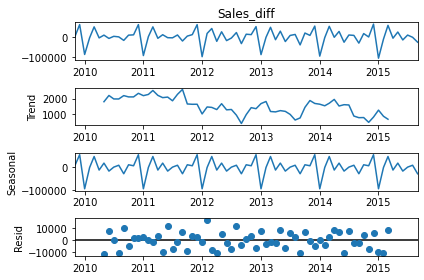

In [33]:
dec=seasonal_decompose(df.Sales_diff.dropna())
fig=dec.plot()

In [34]:
from statsmodels.tsa.ar_model import AR

In [35]:
model=AR(df.Sales_diff.dropna())
m=model.fit()

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C

In [36]:
m.k_ar  #lag value used by model

11

In [37]:
m.params

const             15027.727453
L1.Sales_diff        -0.943287
L2.Sales_diff        -0.864018
L3.Sales_diff        -0.776996
L4.Sales_diff        -0.728419
L5.Sales_diff        -0.650647
L6.Sales_diff        -0.661094
L7.Sales_diff        -0.685425
L8.Sales_diff        -0.759637
L9.Sales_diff        -0.868345
L10.Sales_diff       -0.973031
L11.Sales_diff       -0.999687
dtype: float64

In [38]:
prediction=m.predict(dynamic=False)

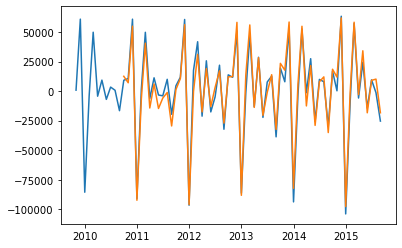

In [39]:
plt.plot(df.Sales_diff)
plt.plot(prediction)